# Check if smaller LMs splite the manthematical definitions and titles intro smaller wordpieces

In [1]:
import transformers
import pandas as pd
import logging
import torch
import numpy as np

from transformers import AutoTokenizer, AutoModelForMaskedLM,AutoModel
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

transformers.logging.set_verbosity_error()

LOG_FORMAT = '%(asctime)s : %(filename)s : %(funcName)s : %(levelname)s : %(message)s'
logging.basicConfig(filename='SentencePairCLS.log', level=logging.INFO, format=LOG_FORMAT)
logger = logging.getLogger("SentencePairCLS")

cuda


In [3]:
import pickle
def pkl_vars(varname, filename):
    with open(filename, 'wb') as file:
        pickle.dump(varname, file)
        
def reload_vars(filename):
    this_var = None
    with open(filename, 'rb') as file:
        this_var = pickle.load(file)      
    return this_var

In [2]:
import matplotlib.pyplot as plt


In [3]:
flattened_test_disam_list = reload_vars('data/vars/flattened_test_disam_list.pkl')
flattened_train_disamb_list = reload_vars('data/vars/flattened_train_disamb_list.pkl')
flattened_disam_list = flattened_test_disam_list + flattened_train_disamb_list
df_flattened_disam_list = pd.DataFrame(flattened_disam_list)
df_flattened_disam_list

,title,term,definition
0,Definition:Boundary (Geometry),Boundary,"\n\nFor example, the endpoints of a line segm..."
1,Definition:Boundary (Topology),Boundary,"Let T = ( S, τ) be a topological space.\n\nLet..."
2,Definition:Boundary (Graph Theory),Boundary,"=== Simple Graph ===\nLet G = ( V, E ) be a si..."
3,Definition:Right (Direction),Right,The direction right is that way:\n:→
4,Definition:Right Angle,Right,A right angle is an angle that is equal to hal...
...,...,...,...
1864,Definition:Congruence (Metric Spaces),Congruence,"Let ( X, d ) be a metric space.\n\nTwo subsets..."
1865,Definition:Congruence Modulo an Ideal,Congruence,"Let ( R, +, ∘) be a ring, and let J be an idea..."
1866,Definition:Congruence Relation,Congruence,"Let ( S, ∘) be an algebraic structure.\n\nLet ..."
1867,Definition:Congruence (Number Theory),Congruence,Let z ∈ℝ.\n\n\n=== Definition by Remainder aft...


In [19]:
%%time
model_path_list = ['sentence-transformers/all-MiniLM-L12-v2',
             'sentence-transformers/all-MiniLM-L6-v2',
             'InriaValda/cc_math_bert_ep10',# pretrained from scratch with MLM
             'InriaValda/cc_math_roberta_ep10', # pretrained from scratch with MLM
             'bert-base-uncased',
             'math-similarity/Bert-MLM_arXiv',
             'math-similarity/Bert-MLM_arXiv-MP-class_zbMath',
             'Lihuchen/pearl_small'
             ]
for p in model_path_list:
    tokenizer = AutoTokenizer.from_pretrained(p)
    df_flattened_disam_list[f"{p.split('/')[-1]}_tokenized_title_len"] = tokenizer(list(df_flattened_disam_list['title']), return_length=True).length
    df_flattened_disam_list[f"{p.split('/')[-1]}_tokenized_term_len"] = tokenizer(list(df_flattened_disam_list['term']), return_length=True).length
    df_flattened_disam_list[f"{p.split('/')[-1]}_tokenized_definition_len"] = tokenizer(list(df_flattened_disam_list['definition']), return_length=True).length

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


CPU times: user 29.4 s, sys: 632 ms, total: 30 s
Wall time: 3.5 s


In [20]:
df_flattened_disam_list.describe()

,all-MiniLM-L12-v2_tokenized_title_len,all-MiniLM-L12-v2_tokenized_term_len,all-MiniLM-L12-v2_tokenized_definition_len,all-MiniLM-L6-v2_tokenized_title_len,all-MiniLM-L6-v2_tokenized_term_len,all-MiniLM-L6-v2_tokenized_definition_len,cc_math_bert_ep10_tokenized_title_len,cc_math_bert_ep10_tokenized_term_len,cc_math_bert_ep10_tokenized_definition_len,cc_math_roberta_ep10_tokenized_title_len,...,bert-base-uncased_tokenized_definition_len,Bert-MLM_arXiv_tokenized_title_len,Bert-MLM_arXiv_tokenized_term_len,Bert-MLM_arXiv_tokenized_definition_len,Bert-MLM_arXiv-MP-class_zbMath_tokenized_title_len,Bert-MLM_arXiv-MP-class_zbMath_tokenized_term_len,Bert-MLM_arXiv-MP-class_zbMath_tokenized_definition_len,pearl_small_tokenized_title_len,pearl_small_tokenized_term_len,pearl_small_tokenized_definition_len
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,8.520064,3.360621,138.789192,8.520064,3.360621,138.789192,7.888175,3.098983,134.768325,8.884430,...,138.789192,8.520064,3.360621,138.789192,8.520064,3.360621,138.789192,8.520064,3.360621,138.789192
std,2.191146,0.772570,225.788354,2.191146,0.772570,225.788354,1.885313,0.349891,220.630905,2.288721,...,225.788354,2.191146,0.772570,225.788354,2.191146,0.772570,225.788354,2.191146,0.772570,225.788354
min,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,...,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000,5.000000,3.000000,2.000000
25%,7.000000,3.000000,47.000000,7.000000,3.000000,47.000000,6.000000,3.000000,46.000000,7.000000,...,47.000000,7.000000,3.000000,47.000000,7.000000,3.000000,47.000000,7.000000,3.000000,47.000000
50%,8.000000,3.000000,81.000000,8.000000,3.000000,81.000000,8.000000,3.000000,79.000000,9.000000,...,81.000000,8.000000,3.000000,81.000000,8.000000,3.000000,81.000000,8.000000,3.000000,81.000000
75%,10.000000,3.000000,149.000000,10.000000,3.000000,149.000000,9.000000,3.000000,145.000000,10.000000,...,149.000000,10.000000,3.000000,149.000000,10.000000,3.000000,149.000000,10.000000,3.000000,149.000000
max,19.000000,7.000000,5416.000000,19.000000,7.000000,5416.000000,18.000000,7.000000,5348.000000,22.000000,...,5416.000000,19.000000,7.000000,5416.000000,19.000000,7.000000,5416.000000,19.000000,7.000000,5416.000000


In [17]:
df_flattened_disam_list.describe().to_csv("comp_tokenized_len.csv")

In [4]:
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L12-v2')
tokenizer('Definition:Congruence Relation')

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


{'input_ids': [101, 6210, 1024, 26478, 6820, 10127, 7189, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

In [11]:
tokenizer(['Definition:Congruence Relation', 'Definition:Right (Direction)'],return_length=True)

{'input_ids': [[101, 6210, 1024, 26478, 6820, 10127, 7189, 102], [101, 6210, 1024, 2157, 1006, 3257, 1007, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1]], 'length': [8, 8]}

In [10]:
tokenizer.convert_ids_to_tokens([101, 6210, 1024, 26478, 6820, 10127, 7189, 102], skip_special_tokens=True)

['definition', ':', 'cong', '##ru', '##ence', 'relation']

In [4]:
flattened_train_disamb_list = reload_vars('data/vars/flattened_train_disamb_list.pkl')
flattened_test_new_candi_disam_list = reload_vars('data/vars/flattened_test_new_candi_disam_list.pkl')
flattened_test_new_term_disam_list = reload_vars('data/vars/flattened_test_new_term_disam_list.pkl')
train = pd.DataFrame(flattened_train_disamb_list)
test_candi = pd.DataFrame(flattened_test_new_candi_disam_list)
test_term = pd.DataFrame(flattened_test_new_term_disam_list)

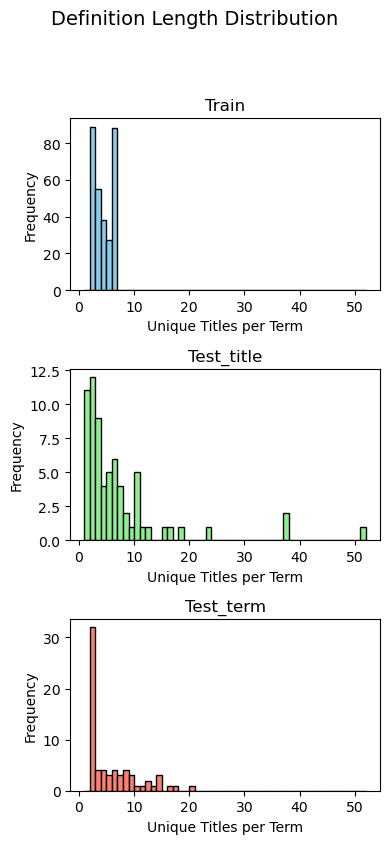

In [35]:
# Calculate unique titles per term
train_counts = train.groupby('term')['title'].nunique()
test1_counts = test_candi.groupby('term')['title'].nunique()
test2_counts = test_term.groupby('term')['title'].nunique()

# Determine max count for consistent binning
max_count = max(train_counts.max(), test1_counts.max(), test2_counts.max())
bins = range(1, max_count + 2)  # Bins cover all possible counts

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(4, 8))

# Plot histograms
axes[0].hist(train_counts, bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('Train')
axes[0].set_xlabel('Unique Titles per Term')
axes[0].set_ylabel('Frequency')

axes[1].hist(test1_counts, bins=bins, color='lightgreen', edgecolor='black')
axes[1].set_title('Test_title')
axes[1].set_xlabel('Unique Titles per Term')
axes[1].set_ylabel('Frequency')

axes[2].hist(test2_counts, bins=bins, color='salmon', edgecolor='black')
axes[2].set_title('Test_term')
axes[2].set_xlabel('Unique Titles per Term')
axes[2].set_ylabel('Frequency')

plt.suptitle('Definition Length Distribution', y=1.05, fontsize=14)
plt.tight_layout()
plt.savefig('fig/train_test_title_term_dist.pdf')

In [9]:
plt.savefig('fig/train_test_title_term_dist.pdf')

<Figure size 640x480 with 0 Axes>

In [17]:
dict(test1_counts)

{'Absolute': 10,
 'Adjacent': 9,
 'Adjoint': 1,
 'Algebra': 5,
 'Algebraic': 10,
 'Altitude': 3,
 'Base': 6,
 'Character': 1,
 'Characteristic': 2,
 'Class': 2,
 'Common': 5,
 'Compact': 2,
 'Complement': 2,
 'Component': 3,
 'Conjugate': 6,
 'Connected': 2,
 'Continuous': 7,
 'Degenerate': 3,
 'Diameter': 2,
 'Dimension': 6,
 'Directed': 3,
 'Discrete': 7,
 'Distance': 4,
 'Dual': 8,
 'Equilibrium': 2,
 'Equivalence': 1,
 'Euclidean': 1,
 'Free': 3,
 'Generated': 10,
 'Generator': 10,
 'Harmonic': 16,
 'Homogeneous': 7,
 'Ideal': 1,
 'Index': 3,
 'Integral': 7,
 'Interior': 1,
 'Inverse': 4,
 'Irreducible': 2,
 'Isomorphism': 5,
 'Kernel': 3,
 'Left': 37,
 'Length': 12,
 'Limit': 6,
 'Mean': 10,
 'Modulus': 2,
 'Node': 1,
 'Normal': 23,
 'Null': 6,
 'Order': 15,
 'Orthogonal': 3,
 'Primitive': 6,
 'Principal': 8,
 'Product': 4,
 'Projection': 2,
 'Proper': 18,
 'Radical': 2,
 'Radius': 3,
 'Regular': 11,
 'Right': 37,
 'Section': 4,
 'Separated': 1,
 'Support': 1,
 'System': 51,
 'Tra

In [18]:
dict(test2_counts)

{'Affine': 12,
 'Associative': 4,
 'Baire Space': 2,
 'Basis': 4,
 'Block': 2,
 'Bounded': 9,
 'Bounded Above': 3,
 'Closed': 20,
 'Closure': 14,
 'Codomain': 2,
 'Compatible': 13,
 'Complete': 12,
 'Complex': 8,
 'Composition': 9,
 'Cone': 2,
 'Convex Set': 2,
 'Couple': 2,
 'Cut': 6,
 'Decomposition': 6,
 'Degree': 16,
 'Dense': 5,
 'Diagonal': 7,
 'Difference': 2,
 'Dihedral': 2,
 'Direct Image': 5,
 'Distributive': 2,
 'Elevation': 2,
 'Empty': 8,
 'Empty Class': 2,
 'Epimorphism': 2,
 'Extension': 10,
 'Field': 3,
 'Finitary': 2,
 'Genus': 4,
 'Grade': 2,
 'Height': 6,
 'Inconsistent': 2,
 'Involution': 2,
 'Left Inverse': 3,
 'Like': 2,
 'Loop': 6,
 'Meet': 3,
 'Minor': 4,
 'One-to-One': 2,
 'Orthogonal Complement': 2,
 'Parity': 2,
 'Pitch': 2,
 'Power': 11,
 'Rank': 7,
 'Resultant': 2,
 'Screw': 2,
 'Secant': 2,
 'Sector': 2,
 'Semimajor Axis': 2,
 'Sign': 5,
 'Similar': 14,
 'Simple': 8,
 'Small': 2,
 'Space': 17,
 'Strong': 2,
 'Substitution': 7,
 'Tensor Product': 2,
 'Term'

In [19]:
train.head()

,title,term,definition
0,Definition:Major (Euclidean),Major,"Let a, b ∈ℝ_>0 in the forms:\n:a = ρ√(2)√(1 + ..."
1,Definition:Ellipse/Major Axis/Semi-Major Axis,Major,:\n\nConsider an ellipse K.\n\n\nA semi-major ...
2,Definition:Lemniscate of Bernoulli/Major Axis,Major,Consider the lemniscate of Bernoulli defined a...
3,Definition:Lemniscate of Bernoulli/Major Semiaxis,Major,Consider the lemniscate of Bernoulli defined a...
4,Definition:Categorical Syllogism/Premises/Majo...,Major,The major premise of a categorical syllogism i...


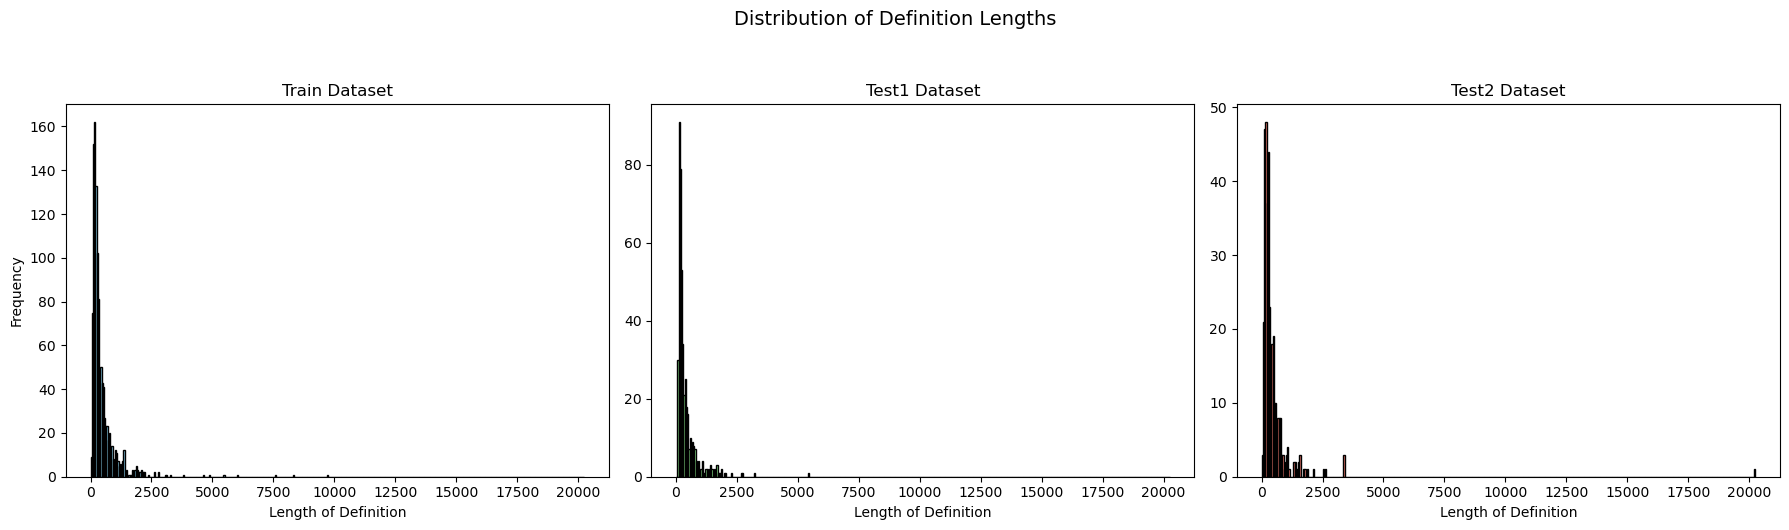

In [20]:

# Calculate lengths of definitions
train_lengths = train['definition'].str.len()
test1_lengths = test_candi['definition'].str.len()
test2_lengths = test_term['definition'].str.len()

# Determine global min/max for consistent binning
min_len = min(train_lengths.min(), test1_lengths.min(), test2_lengths.min())
max_len = max(train_lengths.max(), test1_lengths.max(), test2_lengths.max())
bins = range(min_len, max_len + 50, 50)  # Adjust bin width as needed

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(6, 10))

# Plot distributions
axes[0].hist(train_lengths, bins=bins, color='skyblue', edgecolor='black')
axes[0].set_title('Train Dataset')
axes[0].set_xlabel('Length of Definition')
axes[0].set_ylabel('Frequency')

axes[1].hist(test1_lengths, bins=bins, color='lightgreen', edgecolor='black')
axes[1].set_title('Test1 Dataset')
axes[1].set_xlabel('Length of Definition')

axes[2].hist(test2_lengths, bins=bins, color='salmon', edgecolor='black')
axes[2].set_title('Test2 Dataset')
axes[2].set_xlabel('Length of Definition')

plt.suptitle('Distribution of Definition Lengths', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

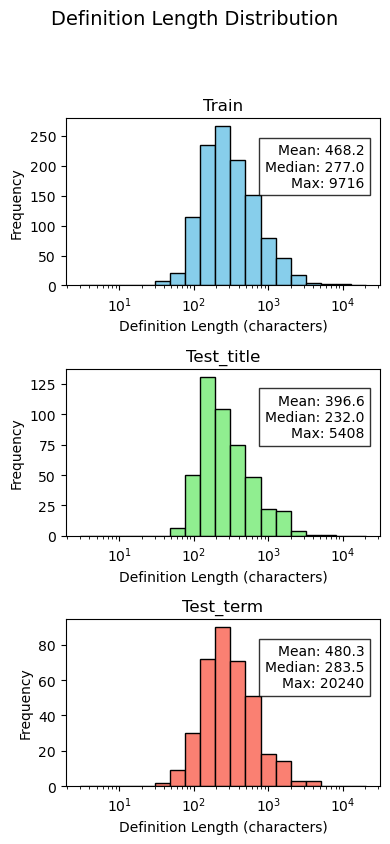

In [34]:
# Create log-spaced bins (handles min_len=0)
min_log = np.log10(min_len) if min_len > 0 else 0
max_log = np.log10(max_len)
bins = np.logspace(min_log, max_log, num=20)

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(4, 8))

# Plot with log x-axis
for ax, lengths, color, name in zip(axes, 
                                  [train_lengths, test1_lengths, test2_lengths],
                                  ['skyblue', 'lightgreen', 'salmon'],
                                  ['Train', 'Test_title', 'Test_term']):
    ax.hist(lengths, bins=bins, color=color, edgecolor='black')
    ax.set_xscale('log')
    ax.set_title(f'{name}')
    ax.set_xlabel('Definition Length (characters)')
    ax.set_ylabel('Frequency')
    
    # Add gridlines for better log-scale readability
    #ax.grid(True, which='both', linestyle='--', alpha=0.5)
    
    # Add statistics
    ax.annotate(
        f"Mean: {lengths.mean():.1f}\nMedian: {lengths.median():.1f}\nMax: {lengths.max()}",
        xy=(0.95, 0.85), xycoords='axes fraction',
        ha='right', va='top', bbox=dict(facecolor='white', alpha=0.8)
    )

plt.suptitle('Definition Length Distribution', y=1.05, fontsize=14)
plt.tight_layout()
plt.savefig('fig/train_test_title_def_length_dist.pdf')